In [1]:
import random
import operator
import requests
import numpy as np
import pandas as pd
from scipy import sparse
import sys
from surprise import Dataset, Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ratings.csv')


display(df[0:5])
print(df['Book-Rating'].unique().tolist())
print(len(df))
print(len(df['User-ID'].unique().tolist()))
print(len(df['ISBN'].unique().tolist()))

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


[0, 5, 3, 6, 8, 7, 10, 9, 4, 1, 2]
1149780
105283
340556


In [3]:
reader = Reader(rating_scale = (0,10)) # rating scale range
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [4]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size = 0.25)
print(type(trainset))

<class 'surprise.trainset.Trainset'>


In [5]:
import itertools

for uid, iid, rating in itertools.islice(trainset.all_ratings(), 5):
    print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")
    
print()    
print(trainset.n_ratings,len(testset))

User 0 rated item 0 with a rating of 0.0
User 0 rated item 48 with a rating of 0.0
User 0 rated item 339 with a rating of 0.0
User 0 rated item 379 with a rating of 0.0
User 0 rated item 1015 with a rating of 0.0

User 216579 rated item 0688178502 with a rating of 0.0
User 98391 rated item 0373835701 with a rating of 8.0
User 188162 rated item 0399127984 with a rating of 9.0
User 63394 rated item 0898795494 with a rating of 7.0
User 42093 rated item 0312308922 with a rating of 0.0

862335 287445


# SVD (Singular Value Decomposition)¶

- Extract latent features between users and items by decomposing the dataset into a low-dimensional space.

- It is computationally efficient compared to memory-based collaborative filtering algorithms, making it suitable for large datasets as well.

- Many parameters need to be adjusted, such as the number of items to recommend and how item similarity is calculated.

# KNNBasic (k-Nearest Neighbors)¶

- Based on the similarity of users and items, it finds the most similar users and items and recommends items that they might like.

- Computational efficiency is relatively high, making it suitable for small datasets.

- The number of parameters is relatively small, so it is easy to tune.

In [6]:
# Use the SVD algorithm to train the model
#algo   =   KNNBasic()
algo = SVD()
algo.fit(trainset)

In [7]:
# Test the model on the testing set
predictions = algo.test(testset)

In [8]:
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")

User 216579 rated item 0688178502 with a rating of 0.0
User 98391 rated item 0373835701 with a rating of 8.0
User 188162 rated item 0399127984 with a rating of 9.0
User 63394 rated item 0898795494 with a rating of 7.0
User 42093 rated item 0312308922 with a rating of 0.0


The 'predictions' is a list of tuples of the form (user, item, actual_rating, predicted_rating, details). The predicted_rating is est value.

In [9]:
for prediction in predictions[0:5]:
    print(prediction)

user: 216579     item: 0688178502 r_ui = 0.00   est = 3.91   {'was_impossible': False}
user: 98391      item: 0373835701 r_ui = 8.00   est = 8.54   {'was_impossible': False}
user: 188162     item: 0399127984 r_ui = 9.00   est = 4.33   {'was_impossible': False}
user: 63394      item: 0898795494 r_ui = 7.00   est = 2.28   {'was_impossible': False}
user: 42093      item: 0312308922 r_ui = 0.00   est = 4.69   {'was_impossible': False}


In [10]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 3.5014


3.501426162180461

In [11]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

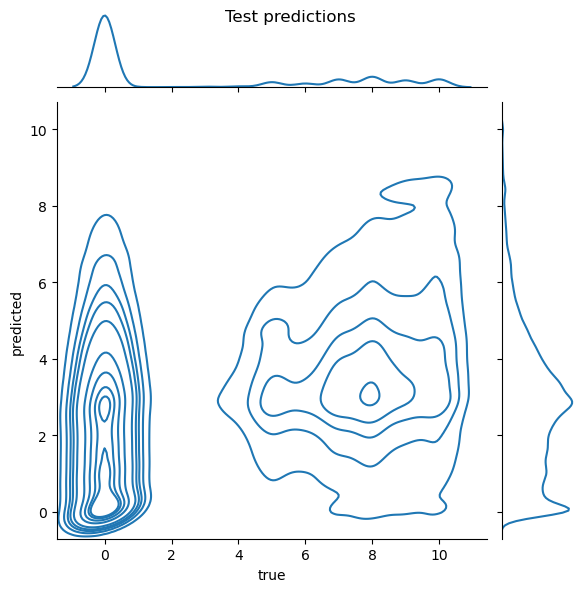

In [12]:
data = pd.DataFrame(columns = ["true","predicted"])
data["true"] = true_ratings
data["predicted"] = est_ratings
g = sns.jointplot(data = data,x = "true", y = "predicted", kind = "kde",)
g.fig.suptitle('Test predictions',fontsize = 12)
plt.show()

Recommend movies to Test Set users

In [13]:
users = list(set(uids))
print(users[0:10])

[262151, 8, 9, 131082, 262152, 14, 131087, 17, 131089, 22]
